<a href="https://colab.research.google.com/github/yenngocduong/Audio-Analysis/blob/main/audio_feature_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import warnings
warnings.filterwarnings('ignore')

In [49]:
import librosa
audio_path = '/content/signal.wav'
x , sr = librosa.load(audio_path)

In [50]:
import IPython.display as ipd
ipd.Audio(audio_path)

(99325,)

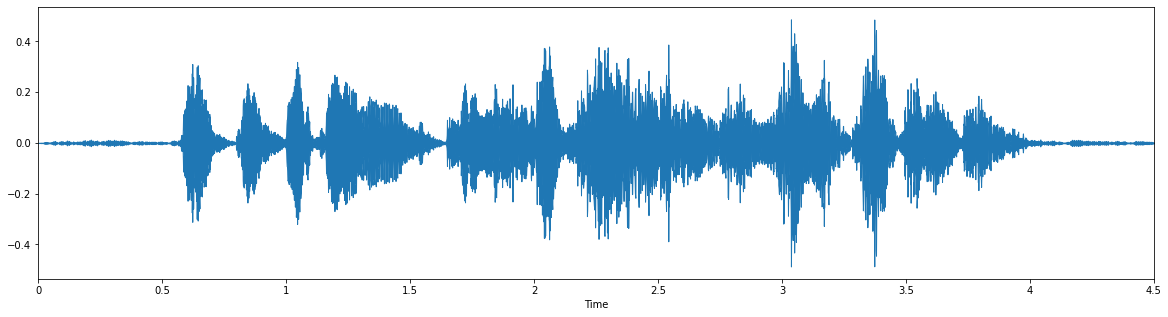

In [51]:
%matplotlib inline
import sklearn
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(20, 5))
librosa.display.waveplot(x, sr=sr)
x.shape

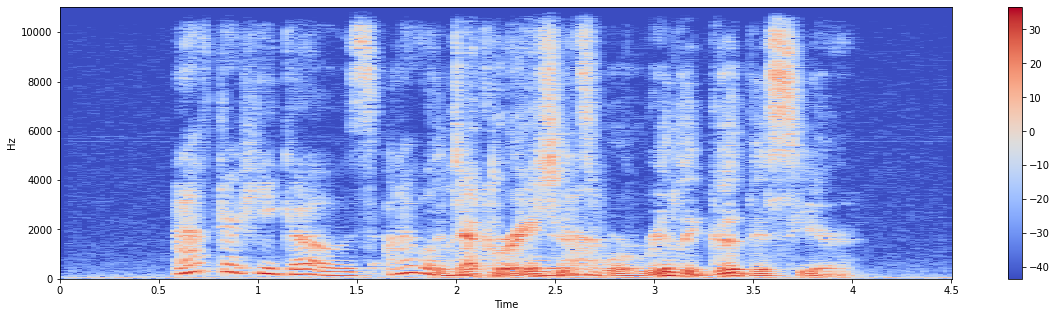

In [52]:
# Display in hz scale
X = librosa.stft(x) # transfer to frequency
Xdb = librosa.amplitude_to_db(abs(X)) #transfer to DB
plt.figure(figsize=(20, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') #show spectrogram
plt.colorbar()

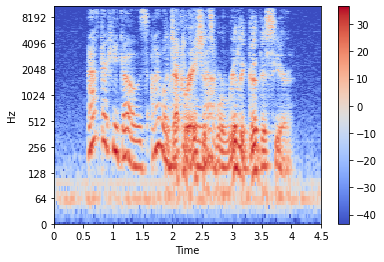

In [53]:
# Display in log scale
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

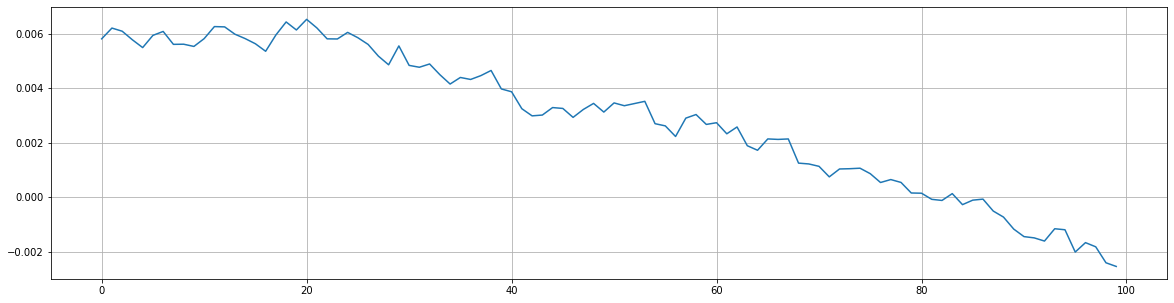

In [54]:
# Zooming in
n0 = 9100
n1 = 9200
x2 = x[n0:n1]
plt.figure(figsize=(20, 5))
plt.plot(x[n0:n1])
plt.grid()

In [55]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
zero_crossings.shape

(100,)

In [56]:
print(sum(zero_crossings))


3


## **Spectral Centroid**

In [57]:
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape

(194,)

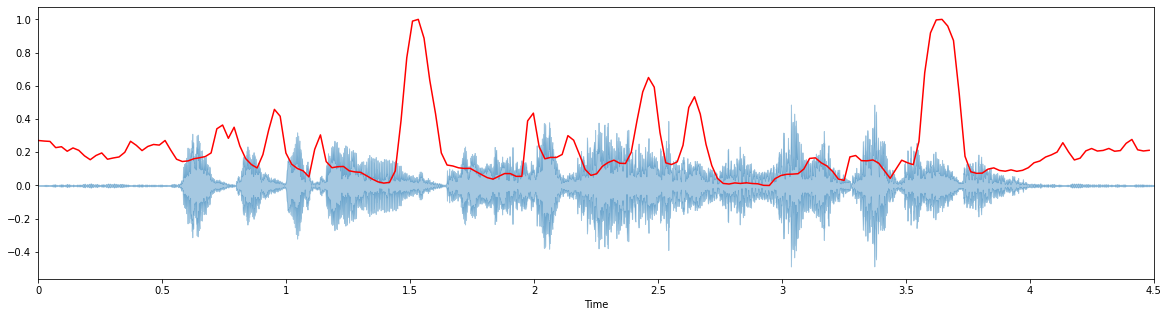

In [58]:
# Computing the time variable for visualization
plt.figure(figsize=(20,5))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

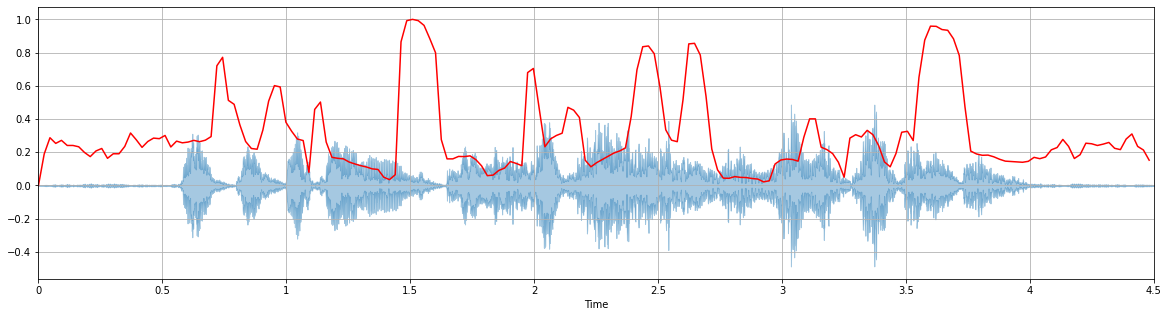

In [59]:
plt.figure(figsize=(20,5))
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')
plt.grid()

## **MFCC**

(20, 194)


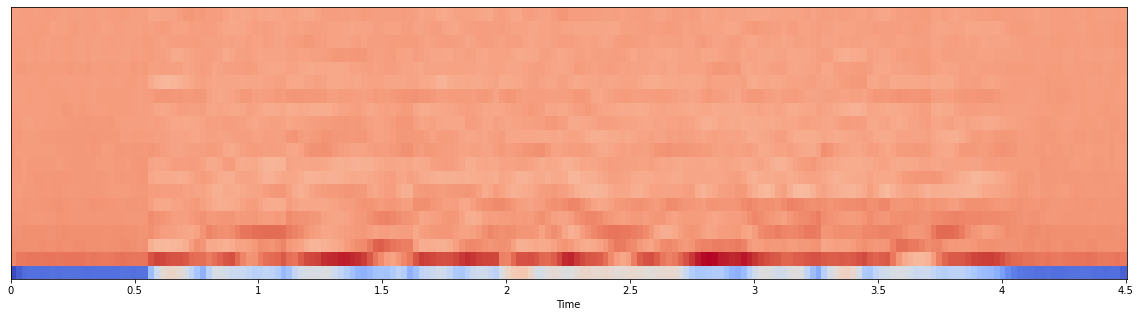

In [60]:
# MFCC
plt.figure(figsize=(20,5))
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)

librosa.display.specshow(mfccs, sr=sr, x_axis='time')

In [61]:
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))

[-2.4579234e-09  5.2230873e-09  0.0000000e+00  4.9158468e-09
 -9.8316937e-09  1.9663387e-08  0.0000000e+00  1.4747541e-08
  2.4579234e-09  9.8316937e-09  1.9663387e-08 -1.9663387e-08
  9.8316937e-09  9.8316937e-09  4.9158468e-09  4.9158468e-09
  9.8316937e-09  4.9158468e-09  6.1448086e-10  0.0000000e+00]
[0.99999994 1.         1.         1.0000001  1.         1.0000001
 1.         1.0000001  1.         0.99999994 1.         1.
 0.99999994 0.9999998  1.         0.9999998  1.0000001  1.0000001
 1.         1.0000001 ]


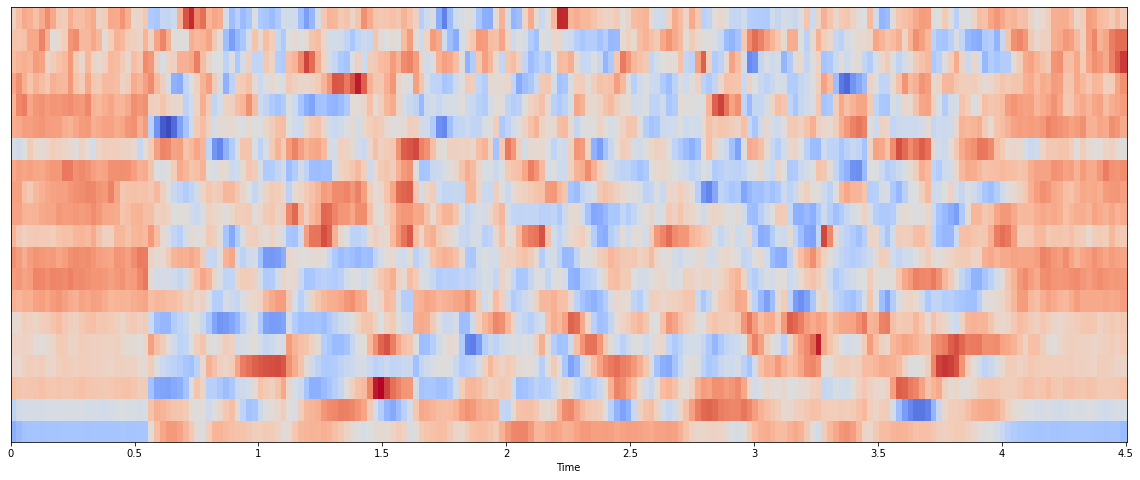

In [62]:
plt.figure(figsize=(20,8))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')